The video with the menu appearing around 1 minute into the video:

In [1]:
from IPython.display import HTML

HTML("""
    <video alt="test" controls>
        <source src="star_craft.mp4" type="video/mp4">
    </video>
""")

Detect the frames that have massive changes:

In [35]:
save_location = './large_img_differences'

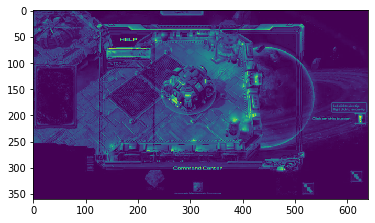

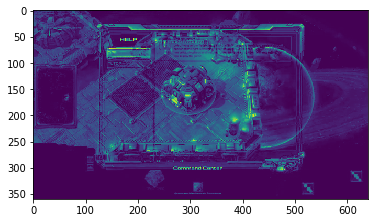

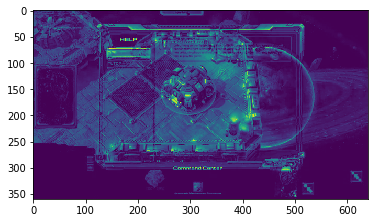

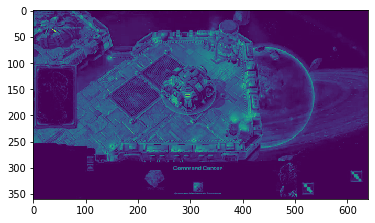

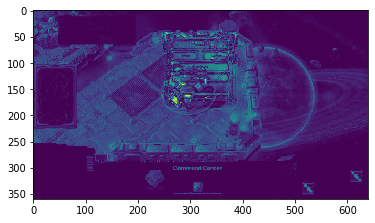

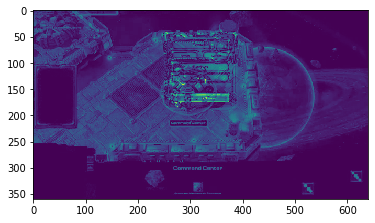

In [36]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

cap = cv2.VideoCapture('star_craft.mp4')

if (cap.isOpened()== False): 
  print("Error opening video stream or file")

ret, current_frame = cap.read()
previous_frame = current_frame

t = 0
stop = False

while(cap.isOpened()):
    if stop:
        break
    current_frame_gray = cv2.cvtColor(current_frame, cv2.COLOR_BGR2GRAY)
    previous_frame_gray = cv2.cvtColor(previous_frame, cv2.COLOR_BGR2GRAY)    

    frame_diff = cv2.absdiff(current_frame_gray, previous_frame_gray)
    
    sum_diff = np.sum(frame_diff)
    
    if sum_diff > 4700000:
#         print(sum_diff)
        plt.imshow(frame_diff)
        plt.show()
        cv2.imwrite(f'{save_location}/large_img_diff_{t}.png', current_frame_gray) 
   
        
    previous_frame = current_frame.copy()
    
    for skip_frame in range(5):
        ret, current_frame = cap.read()
        if not ret:
            stop = True
            
    t += 1

OCR them

Looking for /home/radu/.keras-ocr/craft_mlt_25k.h5
Looking for /home/radu/.keras-ocr/crnn_kurapan.h5


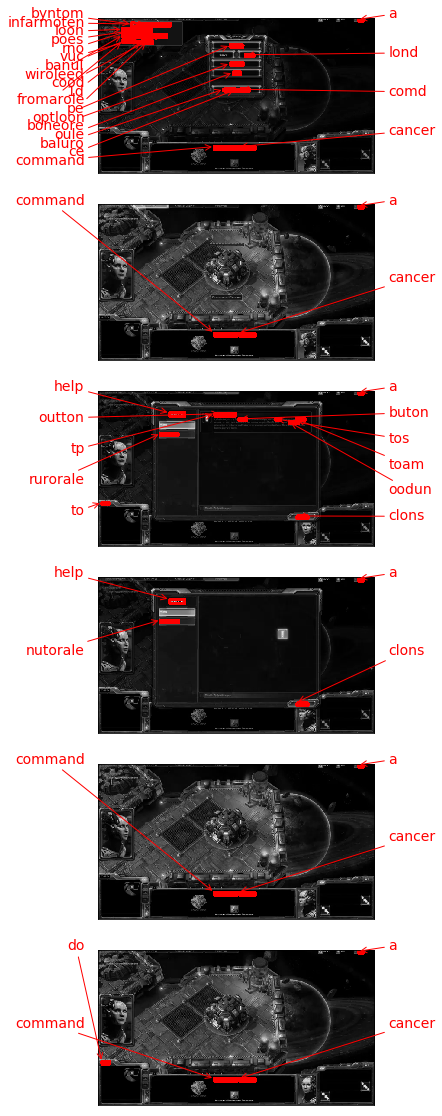

In [43]:
import keras_ocr
import os

# keras-ocr will automatically download pretrained
# weights for the detector and recognizer.
pipeline = keras_ocr.pipeline.Pipeline()

# Get a set of three example images

image_names = []
images = []
for entry in os.listdir(save_location):
    if entry.endswith('.png'):
        image_names.append(entry)
        images.append(
            keras_ocr.tools.read(f'{save_location}/{entry}')
        )

# Each list of predictions in prediction_groups is a list of
# (word, box) tuples.
prediction_groups = pipeline.recognize(images)

# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for ax, image, predictions in zip(axs, images, prediction_groups):
    keras_ocr.tools.drawAnnotations(image=image, predictions=predictions, ax=ax)

Here's a list of common menu items:

In [49]:
menu_item_names = [
    'options',
    'information',
    'help',
    'tutorial',
    'exit',
    'graphics'
]

Check if any of those menu items are present in the large diff images:

large_img_diff_600.png


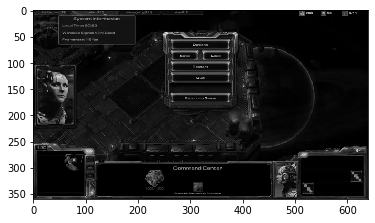

large_img_diff_424.png


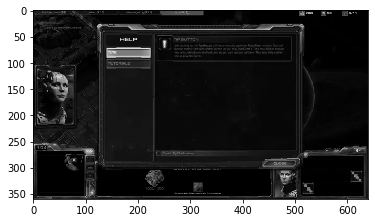

In [56]:
from Levenshtein import distance
for idx, prediction_group in enumerate(prediction_groups):
    number_of_menu_items_found = 0
    for word, location in prediction_group:
        for item in menu_item_names:
            dis = distance(item, word)
            if dis < 4:
                number_of_menu_items_found += 1
    if number_of_menu_items_found > 2:
        print(image_names[idx])
        plt.imshow(images[idx])
        plt.show()